In [2]:
import os

import json
import matplotlib.pyplot as plt

In [3]:
def plot_request_times(gens_dir):
    # list all the files in the directory, read all the jsons and extract the request times
    # then plot a histogram with 20 bins

    request_times = []
    for filename in os.listdir(gens_dir):
        with open(os.path.join(gens_dir, filename)) as f:
            data = json.load(f)
            request_times.append(data["request_time"]) 
    
    plt.hist(request_times, bins=20)
    plt.xlabel("Request time (s)")
    plt.ylabel("Frequency")
    plt.title("Request times")
    plt.show()


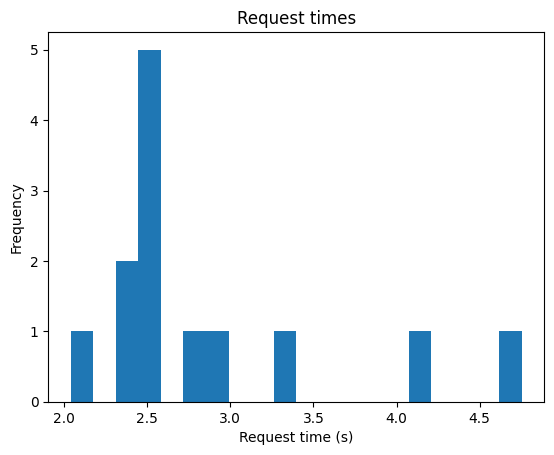

In [4]:
gens_dir = "models/logs/gens_20241010T185915"

plot_request_times(gens_dir)